In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib.colors import Normalize
from matplotlib.collections import PathCollection
import sys
from pyvims import VIMS
import spiceypy as spice

In [58]:
CUBES = [
    VIMS('1711536135_1'),
    VIMS('1711536423_1'),
    VIMS('1711536777_1'),
    VIMS('1711537065_1'),
    VIMS('1711537413_1'),
    VIMS('1711537701_1'),
    VIMS('1711538046_1'),
    VIMS('1711538334_1'),
    VIMS('1711538684_1'),
    VIMS('1711538972_1'),
    VIMS('1711539317_1'),
    VIMS('1711539605_1'),
    VIMS('1711539953_1'),
    VIMS('1711540241_1'),
    VIMS('1711540588_1'),
    VIMS('1711540876_1'),
    VIMS('1711541224_1'),
    VIMS('1711541512_1'),
    VIMS('1711541857_1'),
    VIMS('1711542145_1'),
    VIMS('1711542490_1'),
    VIMS('1711542778_1'),
    VIMS('1711543130_1'),
    VIMS('1711543418_1'),
    VIMS('1711543762_1'),
    VIMS('1711544050_1'),
    VIMS('1711544399_1'),
    VIMS('1711544687_1'),
    VIMS('1711545033_1'),
    VIMS('1711545321_1'),
    VIMS('1711545666_1'),
    VIMS('1711545954_1'),
    VIMS('1711546301_1'),
    VIMS('1711546589_1'),
    VIMS('1711546939_1'),
    VIMS('1711547227_1'),
    VIMS('1711547571_1'),
    VIMS('1711547859_1'),
    VIMS('1711548206_1'),
    VIMS('1711548494_1'),
    VIMS('1711548846_1'),
    VIMS('1711549134_1'),
    VIMS('1711549477_1'),
    VIMS('1711549765_1'),
    VIMS('1711550111_1'),
    VIMS('1711550399_1'),
    VIMS('1711550750_1'),
    VIMS('1711551038_1'),
    VIMS('1711551375_1'),
    VIMS('1711551663_1'),
    VIMS('1711552021_1'),
    VIMS('1711552309_1'),
    VIMS('1711552654_1'),
    VIMS('1711552942_1'),
    VIMS('1711553290_1'),
    VIMS('1711553578_1'),
    # VIMS("1711553950_1"),
    # VIMS("1711554022_1")
]




In [17]:
# #E19
CUBES = [
    # VIMS('1714609767_1'),
    # VIMS('1714609943_1'),
    # VIMS('1714610119_1'),
    # VIMS('1714610267_1'),
    # VIMS('1714610443_1'),
    # VIMS('1714610619_1'),
    # VIMS('1714610795_1'),
    # VIMS('1714610971_1'),
    # VIMS('1714611147_1'),
    # VIMS('1714611323_1'),
    # VIMS('1714629434_1'),
    VIMS('1714629711_1'),
    VIMS('1714630011_1'),
    VIMS('1714630311_1'),
    VIMS('1714630699_1'),
    VIMS('1714630999_1'),
    VIMS('1714631299_1'),
    VIMS('1714631677_3'),
    VIMS('1714631977_1'),
    VIMS('1714632277_1'),
    # VIMS('1714632697_1')
    ]


In [18]:
# #E13
# CUBES = [
#     VIMS("1671579308_1"),
#     VIMS("1671580116_1"),
#     VIMS("1671580920_1"),
#     VIMS("1671581723_1"),
#     VIMS("1671582524_1"),
#     VIMS("1671583330_1")
#           ]

In [59]:
cube = CUBES[0]
mean_ra = np.mean(cube.sky[0])
mean_dec = np.mean(cube.sky[1])
print(mean_ra, mean_dec)

centroids = np.array([[np.mean(cube.sky[0]), np.mean(cube.sky[1])]for cube in CUBES])
distances = np.sqrt(np.sum(np.diff(centroids, axis=0)**2, axis=1))

1.7986232675268008 -5.604794888858001


In [60]:
data = np.array([
    cube.data
    for cube in CUBES
])


paths = [
    Path(cube.rsky[:, l, s, :].T)
    for cube in CUBES
    for l in range(cube.NL)
    for s in range(cube.NS)
]
# print(paths[0])


vertices = np.stack([
    path.vertices
    for path in paths
])


ra_min, dec_min = vertices.min(axis=(0, 1))
ra_max, dec_max = vertices.max(axis=(0, 1))




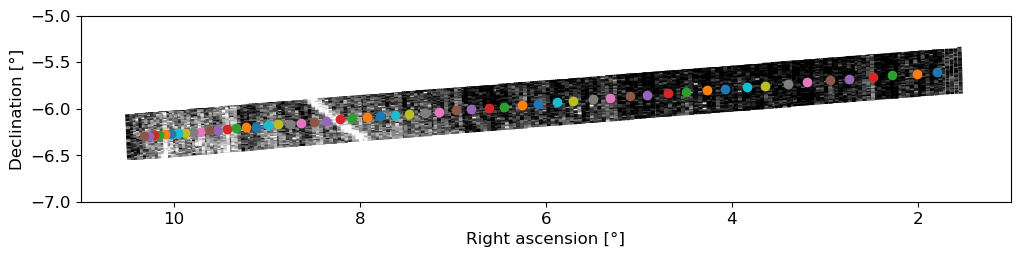

In [61]:
import matplotlib.pyplot as plt



# i = 0    # 0.89 μm
i = 134  # 3.11 μm
i = 254  # 5.11 μm
i1 = 202
i0 = 200

norm = Normalize(vmin=0, vmax=np.percentile(data[:, i, :, :], 99), clip=True)
colors = plt.get_cmap('gray')(norm(data[:, i, :, :].flatten()))

# _, ax = plt.subplots(figsize=(17, 5))
_, ax = plt.subplots(figsize=(12, 4))


# Plot your existing data paths
ax.add_collection(PathCollection(paths, facecolors=colors, edgecolors=colors))
for center in centroids:
    plt.scatter(center[0], center[1])
# Set the plot limits and labels
ax.set_xlim(np.ceil(ra_max + .25), np.floor(ra_min - .25))
ax.set_ylim(np.floor(dec_min - .25), np.ceil(dec_max + .25))

ax.set_xlabel('Right ascension [\u00B0]')
ax.set_ylabel('Declination [\u00B0]')
ax.set_aspect('equal')
# plt.title(f"Flyby E17 with $\lambda$ = 3.11 μm")
# plt.switch_backend('Qt5Agg')  # You can also try 'TkAgg' if Qt isn't available
# plt.savefig("various/E17_311_mosaic.png")
# ax.legend()
plt.rcParams.update({'font.size': 16})  # Change '12' to your desired font size

plt.show()



In [80]:
from datetime import datetime, timedelta
from scipy.ndimage import rotate
from skimage.transform import rescale

# Function to calculate percentiles for color limits
def calculate_percentiles(data, lower=2, upper=98):
    lower_limit = np.percentile(data, lower)
    upper_limit = np.percentile(data, upper)
    return lower_limit, upper_limit

def adjust_aspect_ratio(image, aspect_ratio):
    scaled_image = rescale(image, (aspect_ratio, 1), anti_aliasing=True)
    return scaled_image

def align_stripes_with_mask(image, angle):
    rotated_image = rotate(image, angle, reshape=False)
    mask = rotated_image != 0  # Mask identifying non-zero elements
    return rotated_image, mask


images = []
background = []

for cube in CUBES:
    print(f'Cube name: {cube}')

    #E17
    aspect_ratio = 2       # IR has half pixel lenght in one direction

    data = np.array(cube.data)
    bg_avg = np.mean(data, axis=(1, 2))
    background.append(bg_avg)
    combine_channels = 0
    #   ------------------------------------ rotated ---------------------------------------
    # Initialize a list to store the averaged intensity profiles
    intensity_profiles = []
    ii = np.arange(combine_channels, 256 - combine_channels, 1)  #

    # Define the rotation angle (e.g., 45 degrees if the stripes are diagonal) from x-axis window
    rot_e17 = 35.8
    rot_e19 = 42.2
    rot_e13 = 40.2
    rota = rot_e17
    rotation_angle = 90-rota  # Adjust this angle based on the orientation of the stripes
    # rotation_angle = rota  # Adjust this angle based on the orientation of the stripes

    # Define the aspect ratio correction factor (height scaling factor)
    aspect_ratio_correction = aspect_ratio
    for i in ii:
        if combine_channels:
            cup = data[i - combine_channels:i + combine_channels+1, :, :]
            cup_avg = np.average(cup, axis=0)
            cup = cup_avg
        else:
            cup = data[i, :, :]

        # Adjust the aspect ratio of the image
        adjusted_image = adjust_aspect_ratio(cup, aspect_ratio_correction)
        # adjusted_image = cup
        # Rotate the image to align the stripes and get the mask
        aligned_image, mask = align_stripes_with_mask(adjusted_image, rotation_angle)

        # Compute the average intensity profile across the rows, using the mask to exclude zero regions
        masked_sum = np.sum(aligned_image * mask, axis=0)
        valid_counts = np.sum(mask, axis=0)
        avg_profile = np.divide(masked_sum, valid_counts, where=valid_counts != 0)  # Avoid division by zero

        # Store the averaged profile
        intensity_profiles.append(avg_profile)

    # Stack the profiles to create a 2D kymograph
    kymograph = np.vstack(intensity_profiles)
    images.append(kymograph)

# compute average spectrum of the entire flyby
bg_averages = np.mean(background, axis=0)



Cube name: 1711536135_1
Cube name: 1711536423_1
Cube name: 1711536777_1
Cube name: 1711537065_1
Cube name: 1711537413_1
Cube name: 1711537701_1
Cube name: 1711538046_1
Cube name: 1711538334_1
Cube name: 1711538684_1
Cube name: 1711538972_1
Cube name: 1711539317_1
Cube name: 1711539605_1
Cube name: 1711539953_1
Cube name: 1711540241_1
Cube name: 1711540588_1
Cube name: 1711540876_1
Cube name: 1711541224_1
Cube name: 1711541512_1
Cube name: 1711541857_1
Cube name: 1711542145_1
Cube name: 1711542490_1
Cube name: 1711542778_1
Cube name: 1711543130_1
Cube name: 1711543418_1
Cube name: 1711543762_1
Cube name: 1711544050_1
Cube name: 1711544399_1
Cube name: 1711544687_1
Cube name: 1711545033_1
Cube name: 1711545321_1
Cube name: 1711545666_1
Cube name: 1711545954_1
Cube name: 1711546301_1
Cube name: 1711546589_1
Cube name: 1711546939_1
Cube name: 1711547227_1
Cube name: 1711547571_1
Cube name: 1711547859_1
Cube name: 1711548206_1
Cube name: 1711548494_1
Cube name: 1711548846_1
Cube name: 17115

(56, 256, 34)


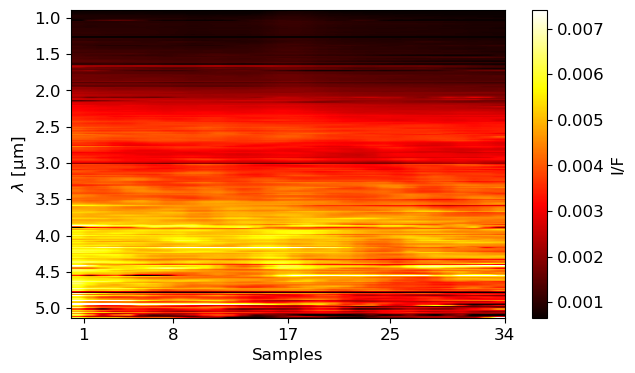

C:\Users\Eigenaar\AppData\Local\Temp\ipykernel_18468\3943304798.py:30: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(x,y, kymograph, cmap='hot',


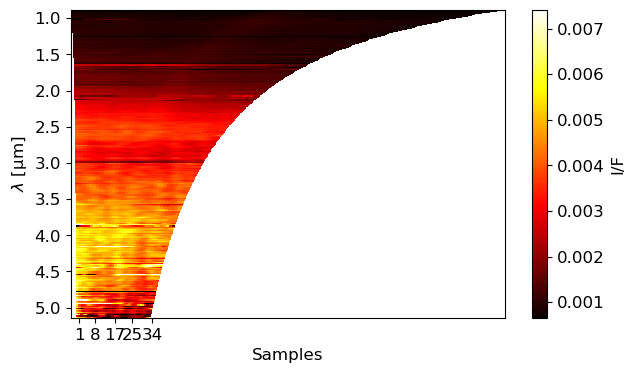

In [82]:
# plot a single kymo
print(np.shape(images))
images_select = images[-19:-18]
for image in images_select:
    kymograph =  image #- bg_averages[:, np.newaxis]
    vmin, vmax = calculate_percentiles(kymograph, lower=2, upper=99.5)
    plt.figure(figsize=(7, 4))
    plt.rcParams.update({'font.size': 12})  # Change '12' to your desired font size
    # Visualize the kymograph
    plt.imshow(kymograph, cmap='hot', aspect='auto',
               extent=[0, kymograph.shape[1], cube.wvlns[-1], cube.wvlns[0]],
               vmin=vmin,vmax=vmax)
    plt.colorbar(label='I/F')
    plt.xlabel('Samples')
    plt.ylabel(f'$\lambda$ [μm]')
    plt.xticks(cube.sticks)
    plt.show()
    # meshgrid
    y_values = cube.wvlns #[::-1]
    x_values = np.arange(0, kymograph.shape[1], 1)
    x, y = np.meshgrid(x_values, y_values)
    x = y_values[-1]*x/y
    # x, y = np.meshgrid(x_values/y_values*y_values[-1], y_values)
    # print(x_values)
    # print(y_values)
    # print(np.shape(kymograph))
    # print(np.shape(x))
    # print(x)
    plt.figure(figsize=(7, 4))
    plt.pcolormesh(x,y, kymograph, cmap='hot',
               vmin=vmin,vmax=vmax)
    plt.gca().invert_yaxis()  # Invert the y-axis

    plt.colorbar(label='I/F')
    plt.xlabel('Samples')
    plt.ylabel(f'$\lambda$ [μm]')
    plt.xticks(cube.sticks)

    # Add title and other annotations
    # time_utc_i = cube.time
    # time_utc_i = datetime.fromisoformat(str(time_utc_i)).strftime("%Y-%m-%d %H:%M:%S")
    # plt.title(f'Cube: {cube}, Mid-Time: {time_utc_i}')
    plt.show()



[0.         0.21552179 0.47860886 0.68978084 0.9439282  1.15079246
 1.39789699 1.60066918 1.84591084 2.04430414 2.28069631 2.47440454
 2.70711646 2.8962938  3.12235632 3.30652168 3.52713877 3.70599367
 3.91838233 4.09210696 4.2979004  4.46592147 4.66903973 4.83120276
 5.02194645 5.17873834 5.36530965 5.51537733 5.6929074  5.83640109
 6.00558307 6.14265255 6.3043987  6.43452998 6.58953088 6.71245959
 6.85596764 6.97176034 7.10768526 7.21628996 7.34496202 7.44561918
 7.56187558 7.65493941 7.76240953 7.84764093 7.94717395 8.02431808
 8.11011133 8.17916372 8.26045827 8.32119525 8.38937008 8.44177149
 8.50068273 8.54501543]
[[0.42488298]
 [0.4263115 ]
 [0.42624855]
 [0.42748624]
 [0.42858952]
 [0.4293347 ]
 [0.4301357 ]
 [0.43123233]
 [0.42991623]
 [0.43274683]
 [0.4326809 ]
 [0.4326958 ]
 [0.43259913]
 [0.43274647]
 [0.43228576]
 [0.4322799 ]
 [0.43252665]
 [0.43226397]
 [0.43241337]
 [0.4320997 ]
 [0.43211251]
 [0.43191877]
 [0.41523632]
 [0.43222788]
 [0.43233693]
 [0.4325195 ]
 [0.43285

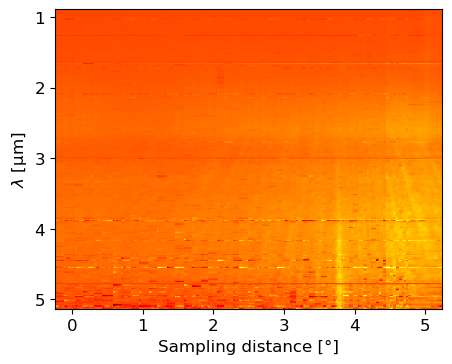

distance between bb and kast cube centroid [deg] = -5.998472356092561


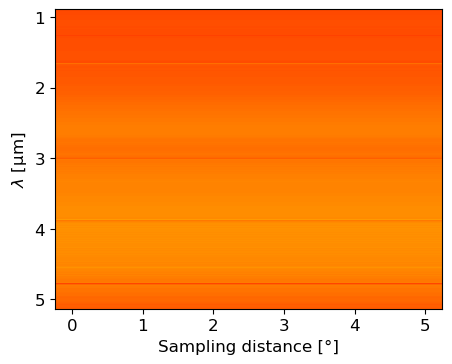

In [117]:


npixels = np.shape(images[0])[1] # number of pixels along sample
w = np.rad2deg(0.5*10**-3) * npixels/2        # pixel effective ifov times number of pixels
h = np.rad2deg(0.5*10**-3) * npixels
heights = np.ones((len(images),1)) *h
widths = np.ones((len(images),1))*w


# rot_angle = np.deg2rad(rota)
# rot_angle = 90
# Compute cumulative x-offsets
x_offsets = np.concatenate(([0], np.cumsum(distances)))
print(x_offsets)

for i in range(len(x_offsets)):
    # x_offsets[i] = x_offsets[i] #*np.cos(90-rot_angle)
    x_offsets[i] = x_offsets[i] *np.cos(np.deg2rad(rotation_angle))


h0, h1 = CUBES[0].wvlns[-1], CUBES[0].wvlns[0]

# Find global min and max across all images
global_min = np.min([np.min(img) for img in images])
global_max = np.max([np.max(img) for img in images])

normalized_bg = (bg_averages[:, np.newaxis]  - global_min) / (global_max - global_min)
print(normalized_bg)
# Create a figure

fig, ax = plt.subplots(figsize=(5,6))
# fig, ax = plt.subplots()

plt.rcParams.update({'font.size': 12})  # Change '12' to your desired font size

# Plot each image at its corresponding x position with specified width and height
for i, (img, width) in enumerate(zip(images, widths)):
    extent = [x_offsets[i] - width / 2,  # Left boundary
              x_offsets[i] + width / 2,  # Right boundary
              h0,               # Bottom boundary
              h1]                # Top boundary


    # Normalize the image based on global min and max
    # print(np.shape(img))
    # normalized_img = img/ global_max
    #- bg_averages[:, np.newaxis]
    normalized_img = (img - global_min) / (global_max - global_min)

    # print(np.shape(normalized_img))
    # normalized_img = img
    ax.imshow(normalized_img, extent=extent, origin='upper', cmap='hot', vmin=0, vmax=0.9)
    # ax.imshow(normalized_img, extent=extent, origin='upper', cmap='hot')#, vmin=0, vmax=0.9)

    # E13
    # ax.imshow(normalized_img, extent=extent, origin='upper', cmap='hot', vmin=0.4, vmax=1.2)
    #19
    # ax.imshow(normalized_img, extent=extent, origin='upper', cmap='hot', vmin=0.2, vmax=1)

    # plt.scatter(x_offsets[i],3)

xes = [0, -1 ]
yes = [3, 0]
# plt.plot(xes, yes)

d_bb_last_cube = xes[1] - x_offsets[-1]
print("distance between bb and kast cube centroid [deg] =", d_bb_last_cube)
# Set limits and aspect ratio
ax.set_xlim(x_offsets[0] - widths[0] / 2, x_offsets[-1] + widths[-1] / 2)
# ax.set_xlim( x_offsets[-1] + widths[-1] / 2, x_offsets[0] - widths[0] / 2)

# triangulate E19
# ax.set_ylim(5.11, 0)
# ax.set_xlim(-2,0.6)


# ax.set_xlim(-1,10)
# ax.set_xlim(9,-0.5)
# ax.set_xlim(-0.5,9)

ax.set_xlabel("Sampling distance [\u00B0]")
ax.set_ylabel(r'$\lambda$ [μm]')
ax.set_aspect(aspect=.25)

# ax.set_ylim(-max(heights) / 2, max(heights) / 2)
ax.set_aspect('equal')
# Hide axes
# ax.axis('off')
# plt.savefig("figures/kymographs/E13_rot/kymo_mosaic_E13_new2.pdf")
# plt.savefig("figures/kymographs/E19_rot/kymo_mosaic_E19_new2.pdf")

# plt.savefig("figures/kymographs/E17_kymo_rot_1channel/E17_mosaic_flipped.pdf")
fig.canvas.toolbar_visible = True
fig.canvas.header_visible = True
fig.canvas.footer_visible = True  # Shows the coordinates at the bottom
# plt.grid()
# Show plot
plt.show()

fig, ax = plt.subplots(figsize=(5,6))

# Plot each image at its corresponding x position with specified width and height
for i, (img, width) in enumerate(zip(images, widths)):
    extent = [x_offsets[i] - width / 2,  # Left boundary
              x_offsets[i] + width / 2,  # Right boundary
              h0,               # Bottom boundary
              h1]                # Top boundary

    normalized_img = (img - global_min) / (global_max - global_min)

    # normalized_img = img
    ax.imshow(normalized_bg, extent=extent, origin='upper', cmap='hot', vmin=0, vmax=0.9)

    # ax.imshow(normalized_img-normalized_bg, extent=extent, origin='upper', cmap='hot', vmin=-0.25, vmax=0.25)
    # ax.imshow(normalized_img/normalized_bg, extent=extent, origin='upper', cmap='hot', vmin=0.85, vmax=1.15)

xes = [0, -1 ]
yes = [3, 0]
# plt.plot(xes, yes)

d_bb_last_cube = xes[1] - x_offsets[-1]
print("distance between bb and kast cube centroid [deg] =", d_bb_last_cube)
# Set limits and aspect ratio
ax.set_xlim(x_offsets[0] - widths[0] / 2, x_offsets[-1] + widths[-1] / 2)
ax.set_xlabel("Sampling distance [\u00B0]")
ax.set_ylabel(r'$\lambda$ [μm]')

# ax.set_ylim(-max(heights) / 2, max(heights) / 2)
ax.set_aspect('equal')
fig.canvas.toolbar_visible = True
fig.canvas.header_visible = True
fig.canvas.footer_visible = True  # Shows the coordinates at the bottom
# plt.grid()
# Show plot
plt.show()


Shift everything so that bb is at x=0

C:\Users\Eigenaar\AppData\Local\Temp\ipykernel_18468\3394023457.py:35: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(x,y, normalized_img, cmap='hot',


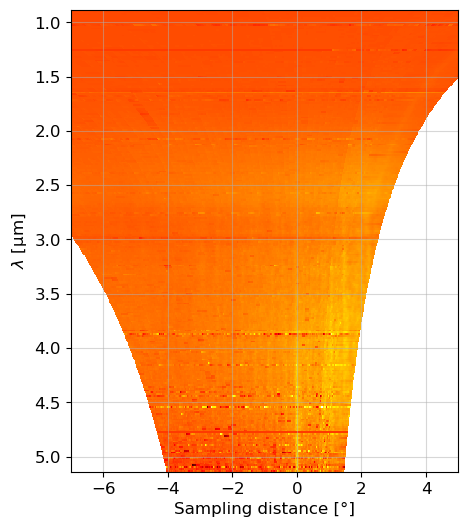

In [108]:
# Define the x-shift
x_shift = -3.78
fig, ax = plt.subplots(figsize=(5,6))

# Compute cumulative x-offsets and apply rotation and shift
x_offsets = np.concatenate(([0], np.cumsum(distances)))
for i in range(len(x_offsets)):
    x_offsets[i] = x_offsets[i] * np.cos(np.deg2rad(rotation_angle))

# Apply the shift
x_offsets = x_offsets + x_shift

# Plot each image at its corresponding x position with specified width and height
for i, (img, width) in enumerate(zip(images, widths)):
    extent = [x_offsets[i] - width / 2,  # Left boundary
              x_offsets[i] + width / 2,  # Right boundary
              h0,                        # Bottom boundary
              h1]                        # Top boundary

    # Normalize the image based on global min and max
    normalized_img = (img - global_min) / (global_max - global_min)
    # ax.imshow(normalized_img, extent=extent, origin='upper', cmap='hot', vmin=0, vmax=0.9)

    # meshgrid
    y_values = cube.wvlns #[::-1]
    x_values = np.linspace(extent[0], extent[1], cube.NS)
    x, y = np.meshgrid(x_values, y_values)
    x = y_values[-1]*x/y
    # x, y = np.meshgrid(x_values/y_values*y_values[-1], y_values)
    # print(x_values)
    # print(y_values)
    # print(np.shape(kymograph))
    # print(np.shape(x))
    # print(x)
    plt.pcolormesh(x,y, normalized_img, cmap='hot',
               vmin=0,vmax=0.9)

# Update x-axis limits to reflect the shift
# ax.set_xlim(x_offsets[0] - widths[0] / 2, x_offsets[-1] + widths[-1] / 2)
ax.set_xlim(-7, 5)
# ax.set_ylim(3, cube.wvlns[-1])
# Other settings remain unchanged
ax.set_xlabel("Sampling distance [\u00B0]")
ax.set_ylabel(r'$\lambda$ [μm]')
# ax.set_aspect(aspect=.25)
plt.gca().invert_yaxis()  # Invert the y-axis
plt.grid(alpha=0.5)
# Show the plot
plt.show()


0.78410015810818 -6.764816408784444
(6.806106828859887, -1.428146968174243)


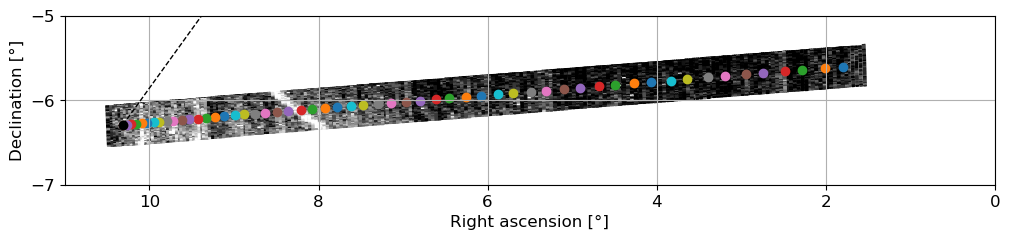

In [19]:
import math
def rotate(origin, point, angle):
    """
    Rotate a point counterclockwise by a given angle around a given origin.

    The angle should be given in radians.
    """
    ox, oy = origin
    px, py = point

    qx = ox + math.cos(angle) * (px - ox) - math.sin(angle) * (py - oy)
    qy = oy + math.sin(angle) * (px - ox) + math.cos(angle) * (py - oy)
    return qx, qy

last_centroid = centroids[-1]
rotated_bb_point = rotate(last_centroid, [last_centroid[0]+d_bb_last_cube, last_centroid[1]], np.deg2rad(-(rotation_angle)))

a_slope =  np.tan(np.deg2rad(rota))
a_slope =  np.tan(np.deg2rad(38.1))


b_bb =    rotated_bb_point[1]-a_slope* rotated_bb_point[0]
print(a_slope, b_bb)
x_bb =  np.linspace(8, 10, 10)
y_bb = []
for x in x_bb:
    y_bbi = a_slope*x + b_bb
    y_bb.append(y_bbi)

print(rotated_bb_point)
# i = 0    # 0.89 μm
i = 134  # 3.11 μm
# i = 254  # 5.11 μm
i1 = 202
i0 = 200
# norm = Normalize(vmin=0, vmax=np.percentile(data[:, i, :, :], 99), clip=True)
# colors = plt.get_cmap('gray')(norm(data[:, i, :, :].flatten()))

# _, ax = plt.subplots(figsize=(17, 5))
_, ax = plt.subplots(figsize=(12, 4))
# Plot your existing data paths
ax.add_collection(PathCollection(paths, facecolors=colors, edgecolors=colors))

# BB from E17
# bb_cube = VIMS("1711546589_1")
# bb_data = bb_cube.data
# paths_bb = [
#     Path(bb_cube.rsky[:, l, s, :].T)
#     for l in range(bb_cube.NL)
#     for s in range(bb_cube.NS)
# ]
# i=254
# bb_norm = Normalize(vmin=0, vmax=np.percentile(bb_data[ i, :, :], 99), clip=True)
# bb_colors = plt.get_cmap('gray')(bb_norm(bb_data[ i, :, :].flatten()))
# ax.add_collection(PathCollection(paths_bb, facecolors=bb_colors, edgecolors=bb_colors))


for center in centroids:
    plt.scatter(center[0], center[1])

plt.scatter(last_centroid[0], last_centroid[1], color="black")
plt.scatter(rotated_bb_point[0], rotated_bb_point[1], color="black")
# plt.scatter(last_centroid[0]+d_bb_last_cube, last_centroid[1], color='red')
plt.plot([last_centroid[0], rotated_bb_point[0]], [last_centroid[1], rotated_bb_point[1]], color="black", lw=1, linestyle="dashed")

plt.plot(x_bb, y_bb)

# Set the plot limits and labels
ax.set_xlim(np.ceil(ra_max + .25), np.floor(ra_min - .25))
ax.set_ylim(np.floor(dec_min - .25), np.ceil(dec_max + .25))
ax.set_xlim(np.ceil(ra_max + .25), np.floor(ra_min - .25)-1)

ax.set_xlabel('Right ascension [\u00B0]')
ax.set_ylabel('Declination [\u00B0]')
ax.set_aspect('equal')
# plt.title(f"Flyby E17 with $\lambda$ = 3.11 μm")
# plt.switch_backend('Qt5Agg')  # You can also try 'TkAgg' if Qt isn't available
# plt.savefig("various/E17_311_mosaic.png")
# ax.legend()
plt.rcParams.update({'font.size': 16})  # Change '12' to your desired font size
plt.grid()
plt.show()



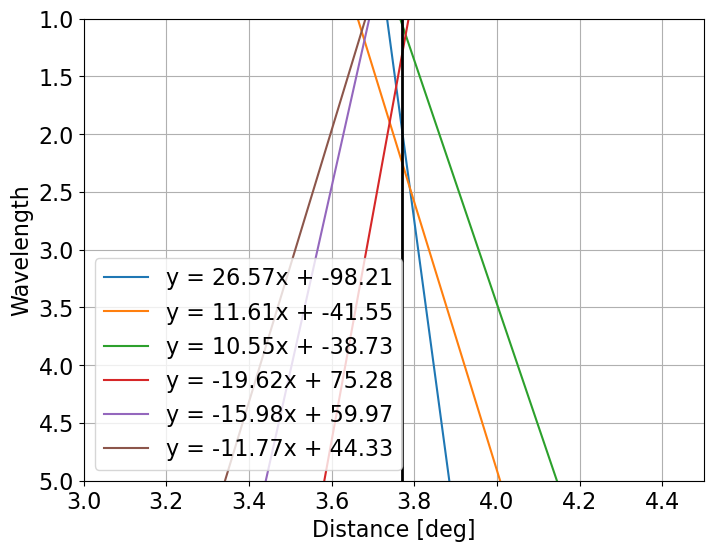

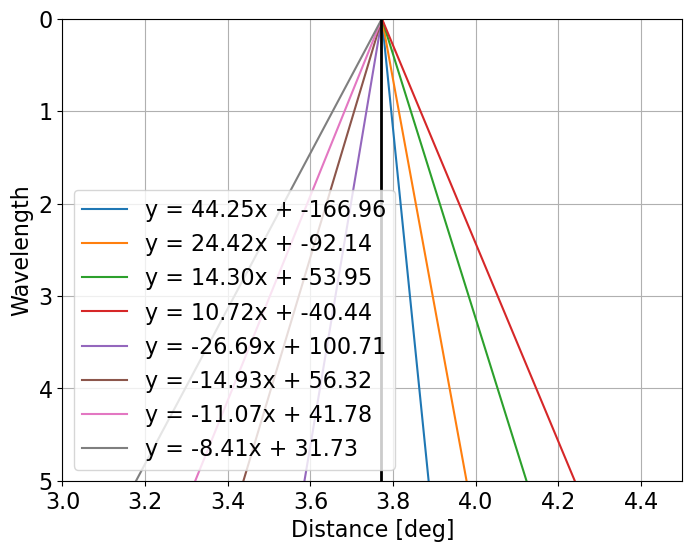

In [20]:
# Define the a and b values from the table

# from single matrix
a_values = [0.952941176, 0.406666667, 0.378787879, -0.754782609, -0.414285714, -0.402898551]
b_values = [-4.865882353, -3.206166667, -3.684242424, -1.399391304, -4.394285714, -4.98826087] # mrad
# b_values = [-0.278794522, -0.183699818, -0.211091542, -0.080179216, -0.251774025, -0.285806295] # deg
# for i in range(len(b_values)):
#     b_values[i] =  np.rad2deg((b_values[i]/1000))

# from single mosaic but not aligned with zero point bb
a_values = [26.56621005, 11.6142132, 10.54893617, -19.61800487, -15.97660099, -11.76676385]#, -16.55401662]
b_values = [-98.20816575, -41.54830914, -38.72820298, 75.28231144, 59.97442722, 44.32773207]#, 59.4426831 ]
# b_values_shifted =  [-101.9811658, -45.32130914, -42.50120298, 71.52231144, 56.21442722, 40.56773207] #, 55.6826831]


# Generate a range of x values
x = np.linspace(0, 7, 30)

# Create the plot
plt.figure(figsize=(8, 6))

# Plot each line using the equation y = ax + b
for a, b in zip(a_values, b_values):
    y = a * x + b
    plt.plot(x, y, label=f'y = {a:.2f}x + {b:.2f}')

# Add labels and title
plt.xlabel('Distance [deg]')
plt.ylabel('Wavelength')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(3.77, color='black',linewidth=2)

plt.ylim(5,1)
plt.xlim(3, 4.5)
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

# Revised single mosaic aligned with zero point
a_values = [44.25208526, 24.4209995, 14.29768875, 10.71797005,-26.69320066, -14.92745158, -11.07426199, -8.408725852]
b_values = [-166.9631177, -92.1404311, -53.94517966, -40.438901, 100.7134461, 56.32127482, 41.7831905, 31.72612264 ]
# Create the plot
plt.figure(figsize=(8, 6))
# x = np.linspace(-1, 1, 30)
# Plot each line using the equation y = ax + b
for a, b in zip(a_values, b_values):
    y = a * x + b
    plt.plot(x, y, label=f'y = {a:.2f}x + {b:.2f}')

# Add labels and title
plt.xlabel('Distance [deg]')
plt.ylabel('Wavelength')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(3.77, color='black',linewidth=2)

plt.ylim(5,0)
plt.xlim(3, 4.5)
plt.grid(True)
plt.legend()

# Show the plot
plt.show()



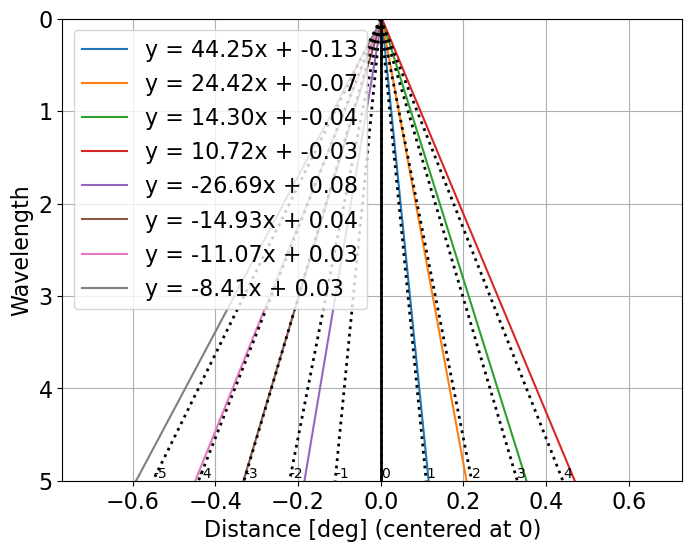

In [21]:
# Shift value
x_shift = 3.77

# Create shifted x-values around the new center (0)
x_shifted = np.linspace(3 - x_shift, 4.5 - x_shift, 100)

# Create the plot
plt.figure(figsize=(8, 6))

# Plot each line using the shifted equation
for a, b in zip(a_values, b_values):
    # Shift the intercept according to the new x=0 being the previous x=3.77
    new_b = a * x_shift + b
    y = a * x_shifted + new_b  # Adjust the intercept
    plt.plot(x_shifted, y, label=f'y = {a:.2f}x + {new_b:.2f}')



orders = np.arange(-5, 5, 1)
d = 1.4e-3
d_min = 2.6e-3
d =  d_min

lambdas =  np.arange(0, 5e-6, 0.1e-6)
for m in orders:
    xdiff = np.rad2deg(np.arcsin(m * lambdas/d))
    plt.plot(xdiff, lambdas*1e6, linestyle='dotted', lw=2, color='black')
    # Add text label near the last point of the line
    plt.text(xdiff[-1], (lambdas[-1]*1e6), f"{m}",
             fontsize=10, color='black', ha='left', va='bottom')

# Add labels and title
plt.xlabel('Distance [deg] (centered at 0)')
plt.ylabel('Wavelength')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=2)  # Plot the vline at x = 0 (centered)

plt.ylim(5, 0)
plt.xlim(x_shifted[0], x_shifted[-1])  # Adjust x-limits accordingly
# plt.xlim(-2,2)
plt.grid(True)
plt.legend()

# Show the plot
plt.show()


(255, 34)
(255, 34)
(255, 34)
(255, 34)
(255, 34)
(255, 34)
(255, 34)
(255, 34)
(255, 34)
(255, 34)
(255, 34)
(255, 34)
(255, 34)
(255, 34)
(255, 34)
(255, 34)
(255, 34)
(255, 34)
(255, 34)
(255, 34)
(255, 34)
(255, 34)
(255, 34)
(255, 34)
(255, 34)
(255, 34)
(255, 34)
(255, 34)
(255, 34)
(255, 34)
(255, 34)
(255, 34)
(255, 34)
(255, 34)
(255, 34)
(255, 34)
(255, 34)
(255, 34)
(255, 34)
(255, 34)
(255, 34)
(255, 34)
(255, 34)
(255, 34)
(255, 34)
(255, 34)
(255, 34)
(255, 34)
(255, 34)
(255, 34)
(255, 34)
(255, 34)
(255, 34)
(255, 34)
(255, 34)
(255, 34)
(255, 34)
(255, 34)
(255, 34)
(255, 34)
(255, 34)
(255, 34)
(255, 34)
(255, 34)
(255, 34)
(255, 34)
(255, 34)
(255, 34)
(255, 34)
(255, 34)
(255, 34)
(255, 34)
(255, 34)
(255, 34)
(255, 34)
(255, 34)
(255, 34)
(255, 34)
(255, 34)
(255, 34)
(255, 34)
(255, 34)
(255, 34)
(255, 34)
(255, 34)
(255, 34)
(255, 34)
(255, 34)
(255, 34)
(255, 34)
(255, 34)
(255, 34)
(255, 34)
(255, 34)
(255, 34)
(255, 34)
(255, 34)
(255, 34)
(255, 34)
(255, 34)


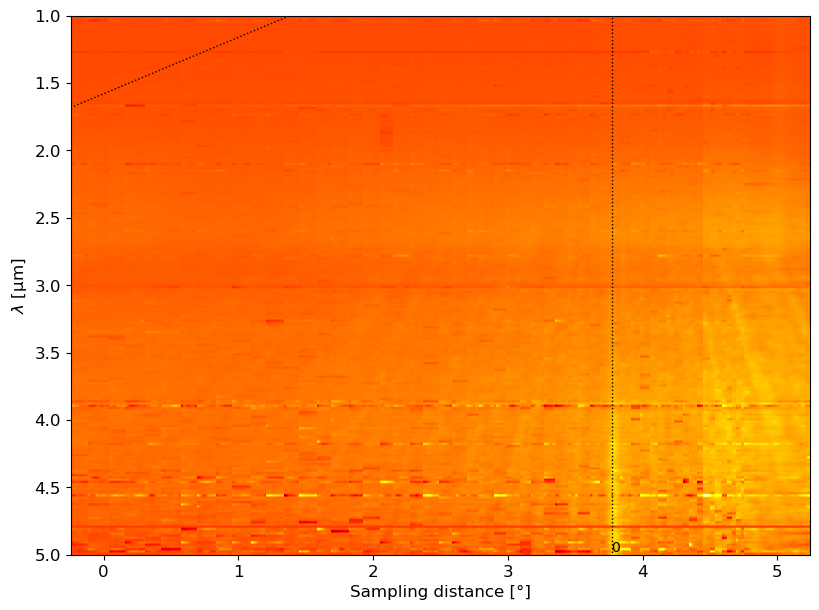

In [27]:
# Create a figure

fig, ax = plt.subplots(figsize=(10, 7))
plt.rcParams.update({'font.size': 12})  # Change '12' to your desired font size

# Plot each image at its corresponding x position with specified width and height
for i, (img, width) in enumerate(zip(images, widths)):
    extent = [x_offsets[i] - width / 2,  # Left boundary
              x_offsets[i] + width / 2,  # Right boundary
              h0,               # Bottom boundary
              h1]                # Top boundary


    # Normalize the image based on global min and max
    print(np.shape(img))
    normalized_img = (img - global_min) / (global_max - global_min)
    print(np.shape(normalized_img))
    # normalized_img = img
    ax.imshow(normalized_img, extent=extent, origin='upper', cmap='hot', vmin=0, vmax=0.9)
    # ax.imshow(normalized_img, extent=extent, origin='upper', cmap='hot', vmin=0.4, vmax=0.6)

    # plt.scatter(x_offsets[i],0)

d =  200e-6

# minimal d
d= 2.6e-3
# max d going from brightest line mostly to the right
# d= 1.9e-4
d = 1.2e-4/5
order_range = 10
orders = np.arange(-order_range, order_range+1, 1)
phase = 159
theta_i = phase/2

for m in orders:
    xdiff = np.rad2deg(m * lambdas/d)
    # xdiff = np.rad2deg(np.arcsin(m*lambdas/d - np.sin(np.deg2rad(theta_i)))) - 3.77

    # plt.plot(xdiff+x_shift, lambdas*1e6, linestyle=(0, (1, 10)), lw=1, color='black')
    plt.plot(xdiff+x_shift, lambdas*1e6, linestyle="dotted", lw=1, color='black')

    # Add text label near the last point of the line
    if x_offsets[0] - widths[0] / 2< xdiff[-1]+x_shift < x_offsets[-1] + widths[-1] / 2:
        plt.text(xdiff[-1]+x_shift, (lambdas[-1]*1e6), f"{m}",
                 fontsize=10, color='black', ha='left', va='bottom')
# Set limits and aspect ratio
ax.set_xlim(x_offsets[0] - widths[0] / 2, x_offsets[-1] + widths[-1] / 2)
# ax.set_xlim( x_offsets[-1] + widths[-1] / 2, x_offsets[0] - widths[0] / 2)

ax.set_ylim(5,1)
# ax.set_xlim(9,-0.5)
# ax.set_xlim(-0.5,9)
ax.set_xlabel("Sampling distance [\u00B0]")
ax.set_ylabel(r'$\lambda$ [μm]')
# ax.set_aspect(aspect=.2)

# ax.set_ylim(-max(heights) / 2, max(heights) / 2)
# ax.set_aspect('equal')
# Hide axes
# ax.axis('off')
# plt.savefig("figures/kymographs/E13_rot/kymo_mosaic_E13.png")
# plt.savefig("figures/kymographs/E17_kymo_rot_1channel/E17_mosaic_flipped.png")
fig.canvas.toolbar_visible = True
fig.canvas.header_visible = True
fig.canvas.footer_visible = True  # Shows the coordinates at the bottom

# Show plot
plt.show()

[1.0e-06 1.1e-06 1.2e-06 1.3e-06]


C:\Users\Eigenaar\PycharmProjects\Thesis\bruton_color.py:43: RuntimeWarning: invalid value encountered in power
  return [np.power(r, gamma), np.power(g, gamma), np.power(b, gamma)]


[Text(0, -0.4, ''),
 Text(0, -0.2, ''),
 Text(0, 0.0, ''),
 Text(0, 0.20000000000000007, ''),
 Text(0, 0.4, ''),
 Text(0, 0.6, ''),
 Text(0, 0.8000000000000002, ''),
 Text(0, 1.0, ''),
 Text(0, 1.2000000000000002, '')]

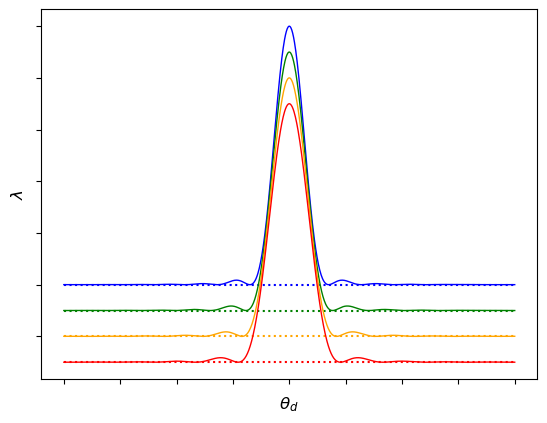

In [14]:
import scipy as sc
import scipy.special as scp
from Thesis.bruton_color import wl2rgb


cor_angle_range = 5
corona_scat = np.linspace(-2, 2, 1000)*np.pi/180     # scattering angle range

wavelength = np.array([0.4e-6, 0.5e-6, 0.6e-6, 0.7e-6])
wavelength = np.array([1e-6, 2e-6, 3e-6, 4e-6, 5e-6])
wavelength = np.array([1e-6, 1.1e-6, 1.2e-6, 1.3e-6])
r = 100e-6                                                    # particle radius
x = list(2 * np.pi * r / wavelength)                        # size parameter
# wavelength = list(wavelength)
print(wavelength)

rgb_colors = np.array([wl2rgb(wl*1e9) for wl in wavelength])
# print(rgb_colors)


colors  = ['blue', 'green', 'orange', 'red']
plt.figure()
offset = 0
for j in range(len(x)):
    bes_argument = x[j] * np.sin(corona_scat)
    j1 = scp.jv(1, bes_argument)        # Using scipy.special.jv for Bessel function of the first kind
    io_corona = (x[j]*(1+np.cos(corona_scat))/2* j1/bes_argument)**2
    io_corona /= np.max(io_corona)  # Normalization

    # Plot the Bessel function
    # plt.plot(corona_scat * 180 / np.pi, io_corona+offset, color=rgb_colors[j], label=f"{int(wavelength[j]*1e9)}nm")
    plt.plot(corona_scat * 180 / np.pi, io_corona+offset,  label=f"{int(wavelength[j]*1e6)}$\mu$m", lw=1, color=colors[j])
    plt.hlines(offset, np.min(corona_scat * 180 / np.pi), np.max(corona_scat * 180 / np.pi), linestyle="dotted", color=colors[j])

    offset += -0.1

orders = np.arange(-3, 4, 1)
lambdas =  wavelength
d = r
x_shift = 0
# for m in orders:
#     xdiff = np.rad2deg(m * lambdas/d)
#     # xdiff = np.rad2deg(np.arcsin(m*lambdas/d - np.sin(np.deg2rad(theta_i)))) - 3.77
#
#     # plt.plot(xdiff+x_shift, lambdas*1e6, linestyle=(0, (1, 10)), lw=1, color='black')
#     plt.plot(xdiff+x_shift, lambdas*1e6, linestyle="dotted", lw=1, color='black')
#
#     # Add text label near the last point of the line
#     if x_offsets[0] - widths[0] / 2< xdiff[-1]+x_shift < x_offsets[-1] + widths[-1] / 2:
#         plt.text(xdiff[-1]+x_shift, (lambdas[-1]*1e6), f"{m}",
#                  fontsize=10, color='black', ha='left', va='bottom')
# plt.legend()
# plt.yscale('log')
# plt.ylim(0, 0.04)
plt.ylabel(r"$\lambda$")
plt.xlabel(r"$\theta_d$")
# Hide the x and y axis tick labels
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])

# hide everything
# plt.xticks([])
# plt.yticks([])

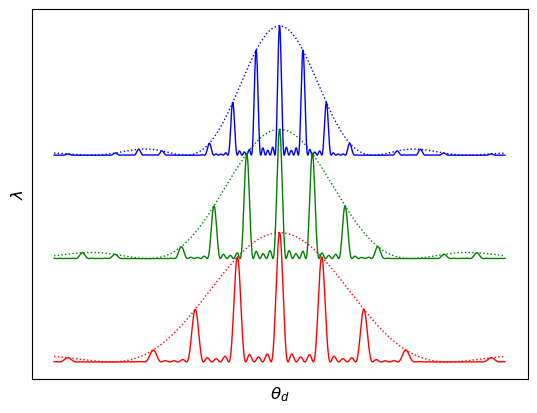

In [192]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
d = 12e-5   # Slit separation in meters (example: 1 mm)
b = 6e-5  # Slit width in meters (example: 0.5 mm)
d = 12e-5   # Slit separation in meters (example: 1 mm)
b = 3e-5  # Slit width in meters (example: 0.5 mm)

wavelengths = [500e-9, 600e-9]  # List of wavelengths (example: 1000 nm and 1100 nm)
wavelengths = np.array([0.4e-6, 0.5e-6, 0.6e-6, 0.7e-6])
wavelengths = np.array([ 0.5e-6, 0.7e-6, 0.9e-6])

# wavelengths = [500e-9]
N = 1  # Number of slits
ns = [1, 2, 5]
# Angles (in radians)
theta = np.linspace(-0.04, 0.04, 1000)  # Small angles, e.g., up to ±0.02 radians
colors  = ['blue', 'green', 'orange', 'red']
colors  = ['blue', 'green', 'red']


ns = [1, 5]
plt.figure()#figsize=(6,6))
plt.rcParams.update({'font.size': 12})  # Change '12' to your desired font size

for n in ns:
    i=0
    offset =0
    for wvl in wavelengths:
        # Compute beta for single slit diffraction
        beta = (np.pi * b * np.sin(theta)) / wvl

        # Compute alpha for multiple slit interference
        alpha = (np.pi * d * np.sin(theta)) / wvl
        # simplfied without regarding slit width bt obnly sperations
        # beta = alpha

        # Intensity formula for multiple slits (normalized)
        # Single slit diffraction term: (sin(beta) / beta)^2
        single_slit_term = (np.sin(beta) / beta)**2
        single_slit_term[beta == 0] = 1  # To handle division by zero at beta = 0

        # Multiple slit interference term: (sin(N*alpha) / sin(alpha))^2
        multiple_slit_term = (np.sin(n * alpha) / np.sin(alpha))**2
        multiple_slit_term[alpha == 0] = N**2  # To handle division by zero at alpha = 0

        # Total intensity
        # single_slit_term =1
        # multiple_slit_term =1
        intensity = single_slit_term * multiple_slit_term
        intensity = intensity/np.max(intensity)
        # Plot the result
        if n == 1:
            plt.plot(theta * 180 / np.pi, intensity+ offset, label=f'Wavelength {wvl*1e9:.0f} nm, slits = {n}', color=colors[i], lw=1, linestyle='dotted')  # Convert radians to degrees for x-axis
        else:
            plt.plot(theta * 180 / np.pi, intensity+ offset, label=f'Wavelength {wvl*1e9:.0f} nm, slits = {n}', color=colors[i], lw=1)  # Convert radians to degrees for x-axis
        i += 1
        offset -= 0.8

# plt.title(f'{N}-Slit Diffraction Pattern')
plt.xlabel(r'$\theta_d$')
plt.ylabel('I')
plt.ylabel(r'$\lambda$')
# plt.grid(True)
# plt.legend()
# hide everything
plt.xticks([])
plt.yticks([])
plt.show()


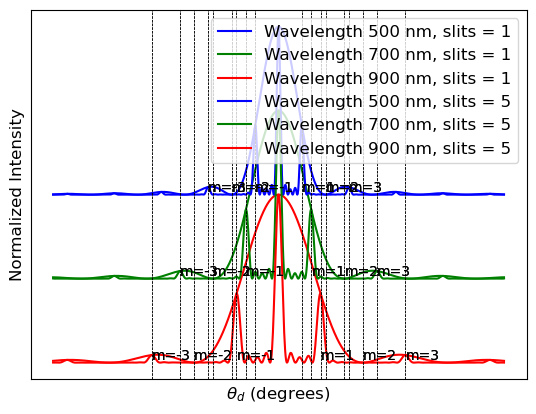

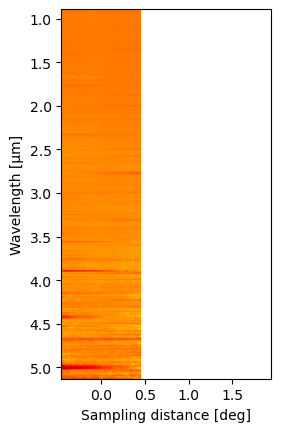

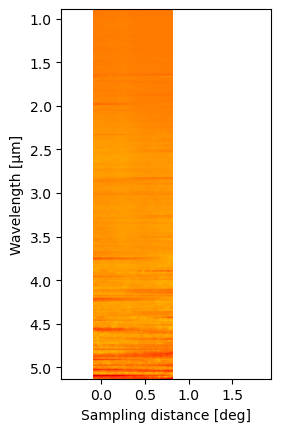

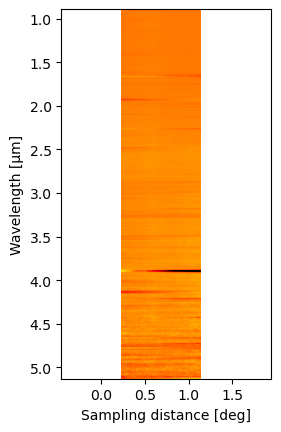

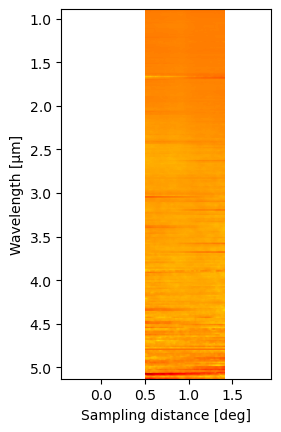

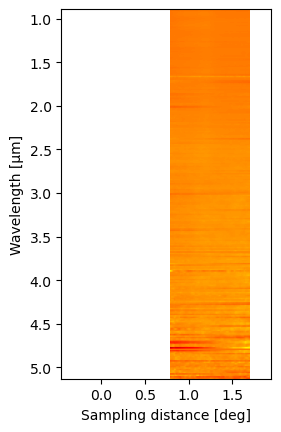

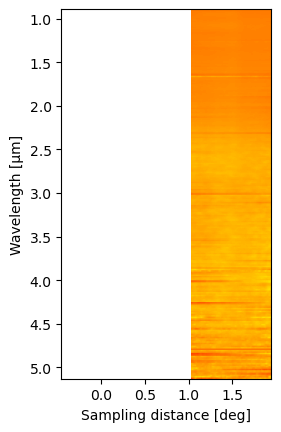

In [77]:

# Plot each image at its corresponding x position with specified width and height
for i, (img, width) in enumerate(zip(images, widths)):
    # Create a figure
    fig, ax = plt.subplots()
    extent = [x_offsets[i] - width / 2,  # Left boundary
              x_offsets[i] + width / 2,  # Right boundary
              h0,               # Bottom boundary
              h1]                # Top boundary
    # Normalize the image based on global min and max
    normalized_img = (img - global_min) / (global_max - global_min)

    ax.imshow(normalized_img, extent=extent, origin='upper', cmap='hot', vmin=0, vmax=0.9)
    # ax.imshow(normalized_img, extent=extent, origin='upper', cmap='hot', vmin=0.1, vmax=1)
    # ax.imshow(normalized_img, extent=extent, origin='upper', cmap='hot', vmin=0.4, vmax=1.2)

    # plt.scatter(x_offsets[i],0)
    # ax.set_xlim(-1,10)
    ax.set_xlim(x_offsets[0] - widths[0] / 2, x_offsets[-1] + widths[-1] / 2)

    ax.set_xlabel("Sampling distance [deg]")
    ax.set_ylabel('Wavelength [μm]')
    # ax.set_aspect(aspect=.2)

    # plt.savefig(f"figures/kymographs/E13_rot/sep/{CUBES[i]}.png")


# Set limits and aspect ratio
# ax.set_xlim(x_offsets[0] - widths[0] / 2, x_offsets[-1] + widths[-1] / 2)
# ax.set_ylim(-max(heights) / 2, max(heights) / 2)
# ax.set_aspect('equal')
# Hide axes
# ax.axis('off')
#
# Show plot
plt.show()


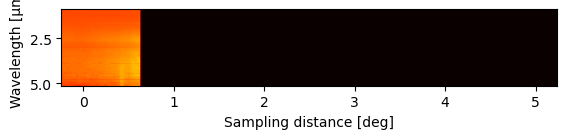

In [105]:
import numpy as np
import matplotlib.pyplot as plt

# Assume 'images' is a list of numpy arrays representing the images.
# The number of pixels in the y-direction should be 256 and the x-direction should be 340.

# Desired resolution for the final canvas
y_res = 256  # Fixed height resolution
x_res = 900  # Fixed width resolution

# Define the canvas where all images will be accumulated
canvas = np.zeros((y_res, x_res))  # To store the sum of pixel values
pixel_counts = np.zeros((y_res, x_res))  # To store how many times a pixel is covered

# Determine scale factor to match the image resolution with the canvas resolution
scale_factor_x = x_res / (npixels)

# Loop through each image and place it on the canvas
for i, img in enumerate(images):
    # Determine the horizontal extent of the image based on x-offset
    x_start = int(np.clip(x_offsets[i] * scale_factor_x, 0, x_res))
    x_end = int(np.clip(x_start + w * scale_factor_x, 0, x_res))

    # If necessary, crop the image in the x-direction to fit the canvas bounds
    img_cropped = img[:, :x_end - x_start]

    # Rescale the image in the y-direction to match the canvas height resolution
    img_rescaled = np.zeros((y_res, img_cropped.shape[1]))
    for col in range(img_cropped.shape[1]):
        img_rescaled[:, col] = np.interp(np.linspace(0, img_cropped.shape[0], y_res),
                                         np.arange(img_cropped.shape[0]),
                                         img_cropped[:, col])

    # Normalize the image using global min and max
    normalized_img = (img_rescaled - global_min) / (global_max - global_min)

    # Add the rescaled image to the canvas, only where it overlaps
    canvas[:, x_start:x_end] += normalized_img
    pixel_counts[:, x_start:x_end] += 1

# Avoid division by zero: ensure that pixel_counts is never zero
pixel_counts[pixel_counts == 0] = 1

# Compute the final averaged image
average_image = canvas / pixel_counts

# Plot the final averaged image
fig, ax = plt.subplots()
h0, h1 = CUBES[0].wvlns[-1], CUBES[0].wvlns[0]
extent = [x_offsets[0] - w / 2, x_offsets[-1] + w / 2, h0, h1]
# extent = []
ax.imshow(average_image, extent=extent, origin='upper', cmap='hot', vmin=0, vmax=0.9)
ax.set_xlabel("Sampling distance [deg]")
ax.set_ylabel('Wavelength [μm]')
ax.set_aspect(0.2)
plt.show()

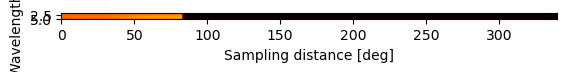

In [98]:
import numpy as np
import matplotlib.pyplot as plt

# Assume 'images' is a list of numpy arrays representing the images.
# The number of pixels in the y-direction should be 256 and the x-direction should be 340.

# Desired resolution for the final canvas
y_res = 256  # Fixed height resolution
x_res = 340  # Fixed width resolution

# Define the canvas where all images will be accumulated
canvas = np.zeros((y_res, x_res))  # To store the sum of pixel values
pixel_counts = np.zeros((y_res, x_res))  # To store how many times a pixel is covered

# Determine scale factor to match the image resolution with the canvas resolution
scale_factor_x = x_res / npixels  # 'npixels' is the width of your original images

# Loop through each image and place it on the canvas
for i, img in enumerate(images):
    # Determine the horizontal extent of the image based on x-offset
    x_start = int(np.clip(x_offsets[i] * scale_factor_x, 0, x_res))
    x_end = int(np.clip(x_start + img.shape[1] * scale_factor_x, 0, x_res))  # Use actual image width

    # Ensure img_cropped is properly placed within canvas bounds
    img_cropped = img[:, :min(img.shape[1], x_end - x_start)]

    # Rescale the image in the y-direction to match the canvas height resolution
    img_rescaled = np.zeros((y_res, img_cropped.shape[1]))
    for col in range(img_cropped.shape[1]):
        img_rescaled[:, col] = np.interp(np.linspace(0, img_cropped.shape[0], y_res),
                                         np.arange(img_cropped.shape[0]),
                                         img_cropped[:, col])

    # Normalize the image using global min and max
    normalized_img = (img_rescaled - global_min) / (global_max - global_min)

    # Compute the slice width
    slice_width = x_end - x_start

    # Ensure that the normalized image width matches the slice width on the canvas
    if normalized_img.shape[1] > slice_width:
        normalized_img = normalized_img[:, :slice_width]
    elif normalized_img.shape[1] < slice_width:
        slice_width = normalized_img.shape[1]

    # Add the rescaled image to the canvas, only where it overlaps
    canvas[:, x_start:x_start + slice_width] += normalized_img
    pixel_counts[:, x_start:x_start + slice_width] += 1

# Avoid division by zero: ensure that pixel_counts is never zero
pixel_counts[pixel_counts == 0] = 1

# Compute the final averaged image
average_image = canvas / pixel_counts

# Plot the final averaged image
fig, ax = plt.subplots()

# Set correct extent to match canvas size
h0, h1 = CUBES[0].wvlns[-1], CUBES[0].wvlns[0]
extent = [0, x_res, h0, h1]  # x_extent now matches full canvas size

ax.imshow(average_image, extent=extent, origin='upper', cmap='hot', vmin=0, vmax=0.9)
ax.set_xlabel("Sampling distance [deg]")
ax.set_ylabel('Wavelength [μm]')
plt.show()
